# PHI Data Tutorial

## Solar Orbiter 8th Workshop (Belfast, UK) - 16th September 2022

### Jonas Sinjan (PhD Student at Max Planck Institute for Solar System Research, Goettingen, Germany)

#### For questions you can reach me by email: sinjan@mps.mpg.de

#### *with many thanks to Gherardo Valori and the SO/PHI team*

<img src="./data_tutorial_files/philogo-1.png" width="220" align="left"/>

In [1]:
import sunpy.map
import sunpy_soar
from sunpy.net import Fido
import sunpy.net.attrs as a
import sunpy.image.coalignment
import imreg_dft
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy import units as u
import astropy.wcs
from belfast_helper import *

In [2]:
print('astropy version:', astropy.__version__)
print('sunpy version: ', sunpy.__version__)

astropy version: 4.3.1
sunpy version:  3.1.0


# 1. Load data

First we will load SO/PHI-HRT and SO/PHI-FDT Data from the SOAR (Solar Orbiter Archive) using `sunpy` and `sunpy_soar`.

This is searching for data around the time of the Inferior Sun conjunction (when SO crossed the Sun-Earth line)

In [2]:
# # Create search attributes (no phi data in SOAR atm)
# instrument = a.Instrument('PHI')
# time = a.Time('2022-03-07', '2022-03-08')
# level = a.Level(2)
# product = a.soar.Product('hrt_blos')

# # Do search
# result = Fido.search(instrument & time & level & product)
# print(result)

# # Download files
# files = Fido.fetch(result)
# print(files)

## FDT (Full Disc Telescope)

In [3]:
fdt_dir = "/data/slam/home/sinjan/hmi_hrt_cc/fdt_files/"
fdt_blos = sunpy.map.Map(fdt_dir + "solo_L2_phi-fdt-blos_20220131T143008_V202206301253_0241310515.fits")
#change colormaps so easier to see limb and detail in blos
# fdt_blos.plot_settings['norm'].vmin = -100
# fdt_blos.plot_settings['norm'].vmax = 100 
fdt_blos.plot_settings['cmap'] = "hmimag"
fdt_blos.plot_settings['norm'] = plt.Normalize(-1500, 1500)

In [28]:
fdt_blos.meta['DATE_EAR']

'2022-01-31T14:31:14.582'

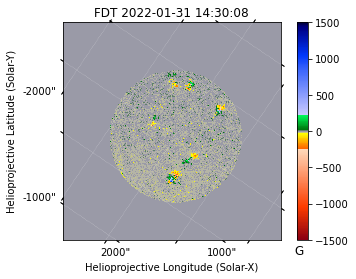

In [4]:
fdt_blos.peek()

## HRT (High Resolution Telescope)

If the SOAR query timed out, here you can load the datasets from the local folder provided as back up

In [64]:
#load hrt datasets
hrt_dir = "/data/solo/phi/data/fmdb/public/l2/2022-03-07/"

hrt_blos_arr = fits.getdata(hrt_dir + "solo_L2_phi-hrt-blos_20220307T000009_V202206021608_0243070101.fits.gz")
hrt_bmag_arr = fits.getdata(hrt_dir + "solo_L2_phi-hrt-bmag_20220307T000009_V202206021608_0243070101.fits.gz")
hrt_binc_arr = fits.getdata(hrt_dir + "solo_L2_phi-hrt-binc_20220307T000009_V202206021608_0243070101.fits.gz")
hrt_bazi_arr = fits.getdata(hrt_dir + "solo_L2_phi-hrt-bazi_20220307T000009_V202206021608_0243070101.fits.gz")
hrt_vlos_arr = fits.getdata(hrt_dir + "solo_L2_phi-hrt-vlos_20220307T000009_V202206021608_0243070101.fits.gz")
hrt_icnt_arr = fits.getdata(hrt_dir + "solo_L2_phi-hrt-icnt_20220307T000009_V202206021608_0243070101.fits.gz")
hrt_stokes_arr = fits.getdata(hrt_dir + "solo_L2_phi-hrt-stokes_20220307T000009_V202206021608_0243070101.fits.gz")

## Data size

It is always good to know how big the data files are when you are handling them.

- Each data product is 2048 x 2048 pixels (16MB for 32bit pixels) 

- Stokes files is an exception: it is a datacube of: 2048 x 2048 x 6 x 4 (384MB for 32bit pixels)

## 2. L2 Data Products (Physical Observables)

The physical observables that SO/PHI creates at the L2 level are:

- Continuum Intensity *[Normalised Intensity (No Unit)]*
- Vector Magnetic Field **B**:
    - Magnetic Field Strength *[Gauss]*
    - Magnetic Field Inclination *[Degrees]*
    - Magnetic Field Azimuth (Ambiguated) *[Degrees]*
- Line-of-sight Magnetic Field (Blos) *[Gauss]*
- Line-of-sight Velocity *[km/s]*

Figure to show inclination and azimuth angle definitions?

- The black edge here is the field stop region (not in the FOV of the telescope)

(2048, 2048)


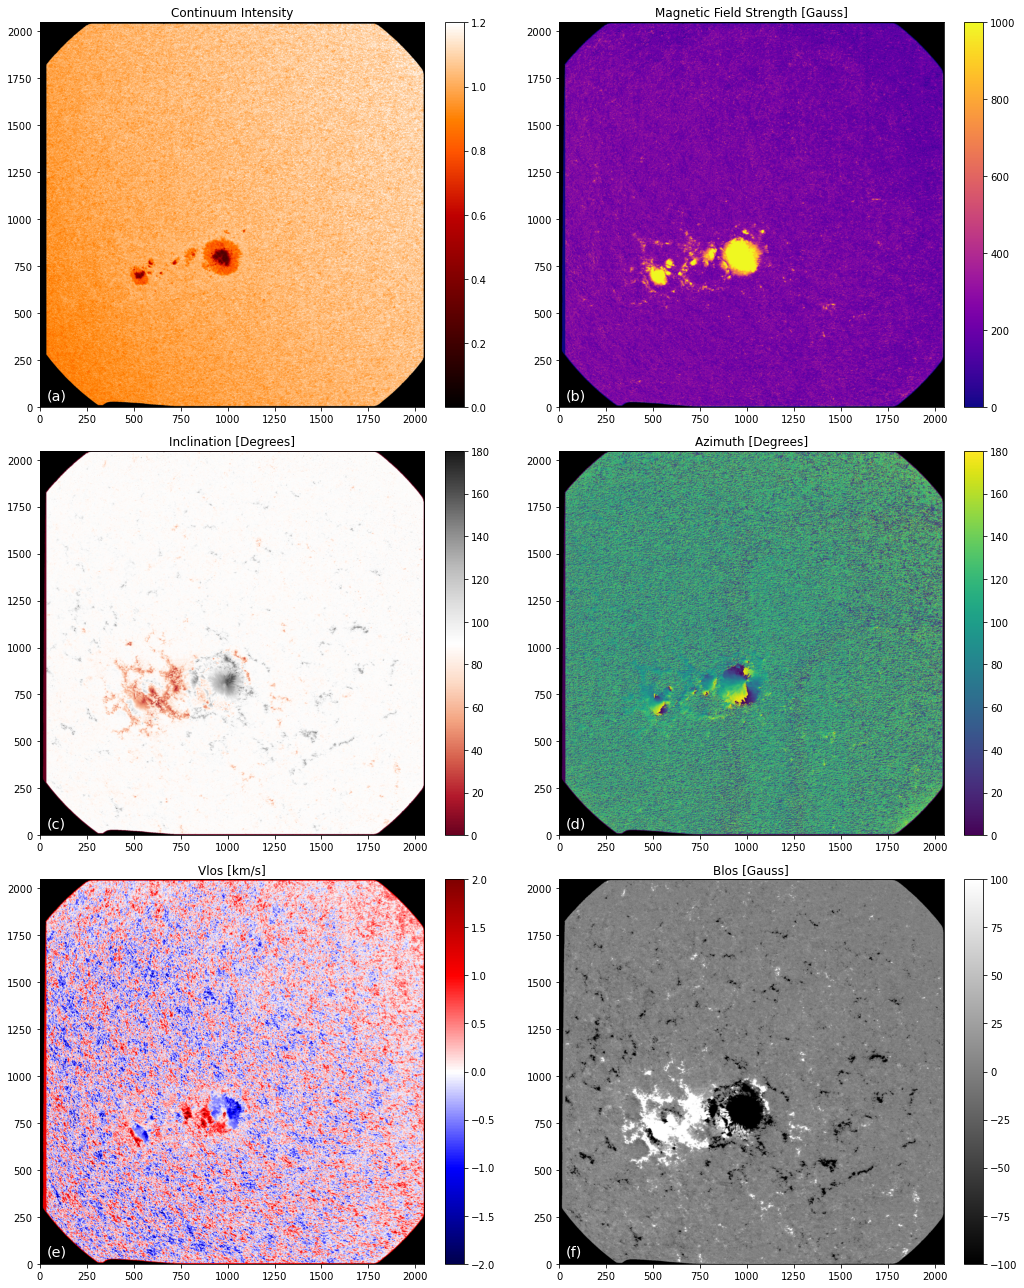

In [3]:
#show all data products, bmag, binc, bazi, blos, icnt (for both HRT and FDT)
data_products = np.asarray([hrt_icnt_arr, hrt_bmag_arr, hrt_binc_arr, hrt_bazi_arr, hrt_vlos_arr, hrt_blos_arr])
plot_hrt_pipe_inver(data_products)

Sunpy integration here is important. These fits files can be read into `sunpy` `Map` objects, like you have seen earlier.

In [66]:
hrt_blos = sunpy.map.Map(hrt_dir + "solo_L2_phi-hrt-blos_20220307T000009_V202206021608_0243070101.fits.gz")

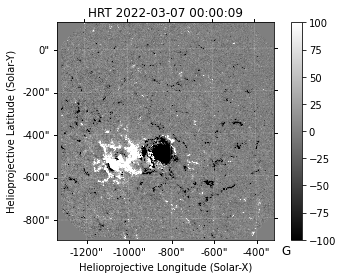

In [67]:
hrt_blos.plot_settings['norm'].vmin = -100
hrt_blos.plot_settings['norm'].vmax = 100
hrt_blos.peek()

In [68]:
hrt_blos.coordinate_frame

<Helioprojective Frame (obstime=2022-03-07T00:00:09.388, rsun=695508.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2022-03-07T00:00:09.388, rsun=695508.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.61964561, -4.2924102, 7.50136902e+10)>)>

In [82]:
hrt_hdr

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2048 / length of data axis 1                          
NAXIS2  =                 2048 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
LONGSTRN= 'OGIP 1.0'           / The HEASARC Long String Convention may be used.
COMMENT   This FITS file may contain long string keyword values that are        
COMMENT   continued over multiple keywords.  The HEASARC convention uses the &  
COMMENT   character at the end of each substring which is then continued        
COMMENT   on the next keywor

## 3. Important to note: *Light Travel Time*

- Solar Orbiter is moving on an elliptical orbit, so its distance to the Sun will change over the course of its orbit.


- Should you want to compare this Solar Orbiter data to Earth-based instruments (eg: SDO/Hinode/SOHO) you might need to take care of light travel time

In [33]:
#Light travel Time, use DATE_EAR for light corrected (also DATE_SUN available)

hrt_hdr = fits.getheader(hrt_dir + "solo_L2_phi-hrt-blos_20220307T000009_V202206021608_0243070101.fits.gz")
print("Date Observed : ", hrt_hdr["DATE-OBS"], "<--- This is the start time of the observation that SOAR queries on") 
print("Average Date  : ", hrt_hdr["DATE-AVG"], "<--- Notice the 23 second difference")
print("Light Travel Time Corrected: ", hrt_hdr["DATE_EAR"], "<--- Notice the > 4 minute difference")

Date Observed :  2022-03-07T00:00:09.388 <--- This is the start time of the observation that SOAR queries on
Average Date  :  2022-03-07T00:00:32.393 <--- Notice the 23 second difference
Light Travel Time Corrected:  2022-03-07T00:04:14.282 <--- Notice the > 4 minute difference


With a time difference of over 4 minutes, this is important when comparing SO/PHI data to that from other instruments, such as SDO/HMI, especially when you are using their high cadence (45second) observables.

Here you can also access this information from the `meta` attributes from the Sunpy `Map` object

In [69]:
hrt_blos.meta['DATE_EAR']

'2022-03-07T00:04:14.282'

## 4. Image Stabilisation System

- on the HRT increased pointing accuracy is required

- hence an Image Stabilisation System (ISS) is available for the HRT only

- sometimes this system is turned off 

- when off this results in a slight noise level increase:

    - Stokes V noise from 1e-3 -->> ~1.3e-3

In [70]:
#Check if ISS on HRT is off or on: (if off Stokes noise level rises from 1e-3 to ~1.3e-4)

print("Image Stabilisation System Status: ", hrt_hdr["ISSMODE1"], " sunpy: ", hrt_blos.meta['ISSMODE1'])
print("ISS_IDLE means it was not operating")

Image Stabilisation System Status:  ISS_IDLE  sunpy:  ISS_IDLE
ISS_IDLE means it was not operating


## 5. Noise Level Estimation

(2048, 2048)
Stokes V noise is: 1.3763e-03


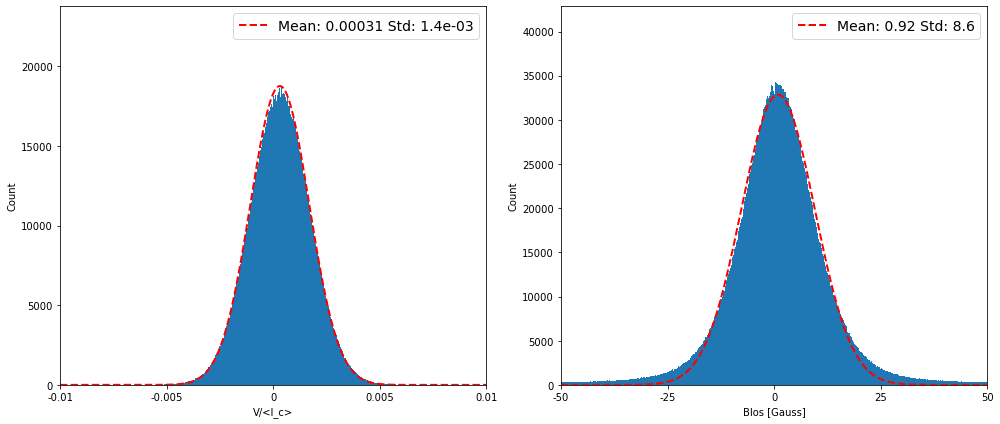

In [3]:
#Small function so they can estimate the noise level

Stokes_V_vector = 3 #I,Q,U,V hence V index == 3
Continuum_wavelength = 5 #For this dataset the continuum is in the 5th wavelength position

noise_both(hrt_stokes_arr[:,:,Stokes_V_vector,Continuum_wavelength], hrt_blos_arr)

## 6. Stokes Maps

- To produce the beautiful data products above, the Stokes information (which is what PHI measures) are put through the Radiative Transfer Equation Inversion (CMILOS)

- If you are interested in the raw Stokes Profiles, that is also available as a L2 data product

- PHI measures the Stokes IQUV vector at 5 wavelength points in the Fe1 6173A line, + one continuum wavelenght point (either red or blue dependent on the Spacecraft's velocity)

- $<I_c>$ here is the averaged Stokes **I** signal at the **C**ontinuum wavelength position

#### hrt_stokes is 2048 x 2048 x 4 x 6 (y, x, stokes, wavelength)

(2048, 2048)


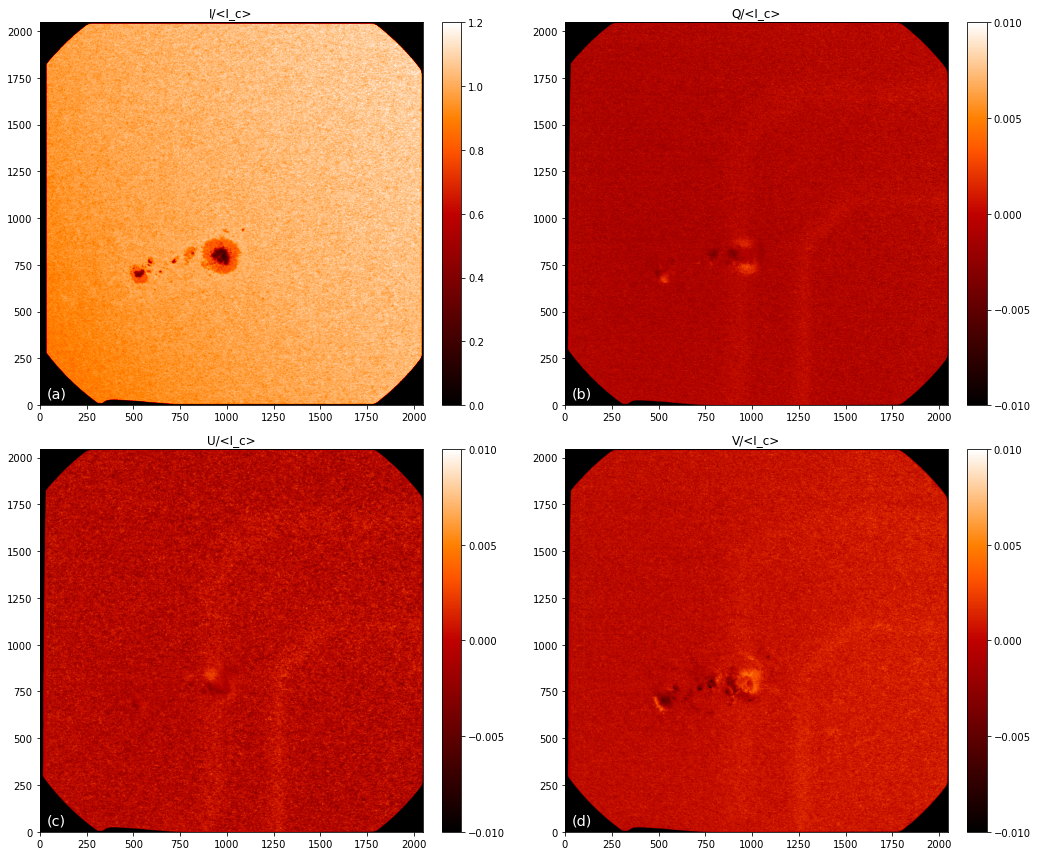

In [5]:
#plot Stokes maps

wavelength = 5 #between 0 and 5

plot_stokes(hrt_stokes_arr, wavelength)

In [ ]:
# plot stokes profiles

# 7. Multi Instrument Mapping

Let's say you want to compare the Blos from SO/PHI-FDT to that from SDO/HMI. We therefore need to reproject SO/PHI-FDT onto the HMI Plane.

Here we load the HMI dataset that we want to work with.


In [4]:
#here we load the HMI Magnetogram that corresponds to the same time (light travel corrected!) and taking into account UTC vs TAI difference of 37 seconds
hmi_dir = "/data/slam/home/sinjan/hmi_hrt_cc/hmi_files/blos_45/"
hmi_blos = sunpy.map.Map(hmi_dir + "hmi.m_45s.20220131_143215_TAI.2.magnetogram.fits")
hmi_blos.plot_settings['cmap'] = "hmimag"
hmi_blos.plot_settings['norm'] = plt.Normalize(-1500, 1500)

We need to rotate the HMI map by 180 degrees, as it has this quirk :D

In [5]:
hmi_blos = hmi_blos.rotate(180 * u.deg)

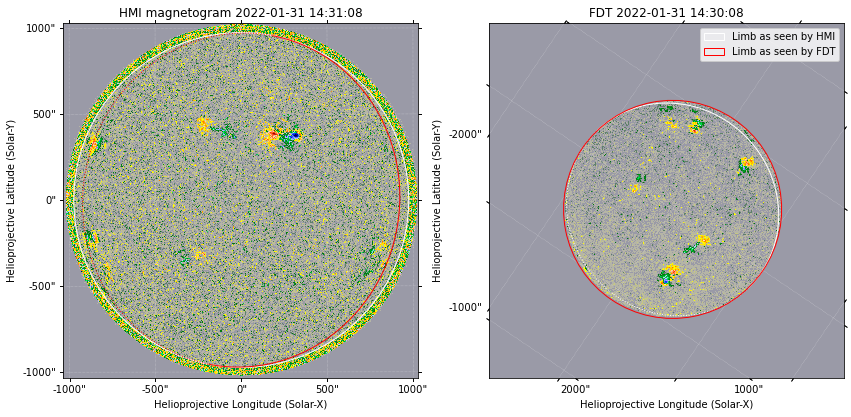

In [6]:
fig = plt.figure(figsize = (14,14))

ax1 = fig.add_subplot(121, projection=hmi_blos)
hmi_blos.plot(axes=ax1)
hmi_blos.draw_limb(axes=ax1, color='white')
fdt_blos.draw_limb(axes=ax1, color='red')

ax2 = fig.add_subplot(122, projection=fdt_blos)
fdt_blos.plot(axes=ax2)
limb_hmi = hmi_blos.draw_limb(axes=ax2, color='white')
limb_fdt = fdt_blos.draw_limb(axes=ax2, color='red')

plt.legend([limb_hmi[0], limb_fdt[0]],
           ['Limb as seen by HMI', 'Limb as seen by FDT'])

First we can use the inbuilt reprojection algorithm in sunpy, which uses the WCS information within the header of the FITS file, to remap it onto the HMI's FOV.

We have to create an out_header using `sunpy.map.make_fitswcs_header` to be the output of the fdt remapped image.

In [7]:
#Show how to rotate FDT onto HMI plane
out_shape = (768,768)#fdt_blos.data.shape

out_header = sunpy.map.make_fitswcs_header(
    out_shape,
    hmi_blos.reference_coordinate.replicate(rsun=fdt_blos.reference_coordinate.rsun),
    scale=u.Quantity(fdt_blos.scale),
    instrument="PHI",
    observatory="HMI Observer"
)

In [8]:
fdt_blos.data.shape

(1024, 1024)

Now we apply the reprojection (this can take 30 seconds or longer)

In [9]:
fdt_outmap = fdt_blos.reproject_to(out_header, algorithm = "adaptive")

(<matplotlib.patches.Polygon at 0x2b7db57cf128>,
 <matplotlib.patches.Polygon at 0x2b7db57cf160>)

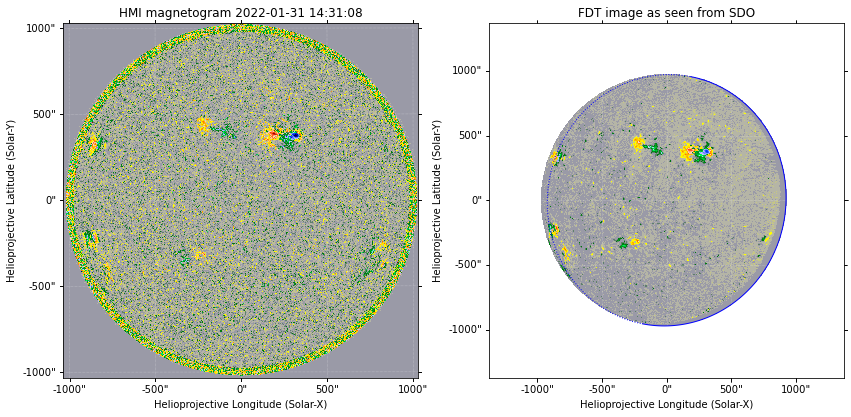

In [10]:
fig = plt.figure(figsize = (14,14))
ax1 = fig.add_subplot(121, projection=hmi_blos)
hmi_blos.plot(axes=ax1)
ax2 = fig.add_subplot(122, projection=fdt_outmap)
fdt_outmap.plot(axes=ax2, title='FDT image as seen from SDO')
fdt_blos.draw_limb(axes=ax2, color='blue')

In [11]:
print(hmi_blos.scale.axis1, hmi_blos.dimensions.x)
print(hmi_blos.scale.axis2, hmi_blos.dimensions.y)
print("#")
print(fdt_outmap.scale.axis1, fdt_outmap.dimensions.x)
print(fdt_outmap.scale.axis2, fdt_outmap.dimensions.y)

0.504032433 arcsec / pix 4098.0 pix
0.504032433 arcsec / pix 4098.0 pix
#
0.00099277777777778 deg / pix 768.0 pix
0.00099277777777778 deg / pix 768.0 pix


In [12]:
hmi_blos_r = hmi_blos.resample(fdt_outmap.dimensions*u.pix)

# This is where I attempt cross-correlation and it all goes wrong

In [22]:
def map_correlation(ref_data, tobe_shifted_data, iterations = 3, map_shift = False):
#hrt, hmi
    sy = int(tobe_shifted_data.shape[0]*0.1)
    sx = int(tobe_shifted_data.shape[1]*0.1)
    ref = ref_data[sy:-sy,sx:-sx]
    temp = tobe_shifted_data[sy:-sy,sx:-sx] 
        
    shift = [0,0]
    for i in range(iterations):
        #iterate shifting the maps, until convergence after 3 iterations
        r,s = image_register(standardize(ref),standardize(temp)/temp.size,deriv=False)
        print('iter '+str(i+1)+', shift (x,y):',round(s[1],3),round(s[0],3))
        shift = [shift[0]+s[0],shift[1]+s[1]]
#         temp = interp_shift(temp,s, order=5, cval=1.)
        temp = fft_shift(temp,s)

    print(iterations,'iterations shift (x,y):',round(shift[1],3),round(shift[0],3))
#     temp = interp_shift(hmi_temp.data, shift, order=5, cval=1.)
    temp = fft_shift(tobe_shifted_data, shift)
    #hmi_shift = sunpy.map.Map((temp,hmi_temp.fits_header))
    #hmi_shift.plot_settings = hmi_temp.plot_settings

    if map_shift:
        return (shift, hmi_shift)
    else:
        return shift, temp

def standardize(array):
    return (array - array.mean())/array.std()

def one_power(array):
    return array/np.sqrt((np.abs(array)**2).mean())

def image_register(ref,im,subpixel=True,deriv=True):
    try:
        import pyfftw.interfaces.numpy_fft as fft
    except:
        import numpy.fft as fft
    import numpy as np
    import sys

    def _image_derivative(d):
        import numpy as np
        from scipy.signal import convolve
        kx = np.asarray([[1,0,-1], [1,0,-1], [1,0,-1]])
        ky = np.asarray([[1,1,1], [0,0,0], [-1,-1,-1]])

        kx=kx/3.
        ky=ky/3.

        SX = convolve(d, kx,mode='same')
        SY = convolve(d, ky,mode='same')

        A=SX+SY

        return A

    def _g2d(X, offset, amplitude, sigma_x, sigma_y, xo, yo, theta):
        import numpy as np
        (x, y) = X
        xo = float(xo)
        yo = float(yo)    
        a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
        b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
        c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
        g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                                + c*((y-yo)**2)))
        return g.ravel()


    def _gauss2dfit(a):
        import numpy as np
        from scipy.optimize import curve_fit
        sz = np.shape(a)
        X,Y = np.meshgrid(np.arange(sz[1])-sz[1]//2,np.arange(sz[0])-sz[0]//2)

        try:
            X = X[~X.mask]; Y = Y[~Y.mask]; a = a[~a.mask]
        except:
            pass

        c = np.unravel_index(a.argmax(),sz)
        y = a[c[0],:]
        x = X[c[0],:]
        stdx = 5 #np.sqrt(abs(sum(y * (x - sum(x*y)/sum(y))**2) / sum(y)))
        y = a[:,c[1]]
        x = Y[:,c[1]]
        stdy = 5 #np.sqrt(abs(sum(y * (x - sum(x*y)/sum(y))**2) / sum(y)))
        initial_guess = [np.median(a), np.max(a), stdx, stdy, c[1] - sz[1]//2, c[0] - sz[0]//2, 0]
        
        popt, pcov = curve_fit(_g2d, (X, Y), a.ravel(), p0=initial_guess)

        return np.reshape(_g2d((X,Y), *popt), sz), popt
 
    if deriv:
        ref = _image_derivative(ref)
        im = _image_derivative(im)
    
    shifts=np.zeros(2)

    FT1=fft.fftn(ref - np.mean(ref))
    FT2=fft.fftn(im - np.mean(im))
    ss=np.shape(ref)

    # cross=FT1*np.conjugate(FT2)/np.sum((FT1*np.conjugate(FT2)))
    r=np.real(fft.ifftn(one_power(FT1) * one_power(FT2.conj())))
    # r = np.roll(r, ss[0]//2, axis = 0)
    # r = np.roll(r, ss[1]//2, axis = 1)
    r = fft.fftshift(r)
    
    rmax=np.max(r)
    ppp = np.unravel_index(np.argmax(r),ss)

    shifts = [(ss[0]//2-(ppp[0])),(ss[1]//2-(ppp[1]))]

    if subpixel:
        g, A = _gauss2dfit(r)
        ss = np.shape(g)
        shifts[0] = A[5]          
        shifts[1] = A[4]
        del g 

    del FT1, FT2

    return r, shifts

In [26]:
def fft_shift(img,shift):
    """
    im: 2D-image to be shifted
    shift = [dy,dx] shift in pixel
    """
    
    try:
        import pyfftw.interfaces.numpy_fft as fft
    except:
        import numpy.fft as fft
    sz = img.shape
    ky = fft.ifftshift(np.linspace(-np.fix(sz[0]/2),np.ceil(sz[0]/2)-1,sz[0]))
    kx = fft.ifftshift(np.linspace(-np.fix(sz[1]/2),np.ceil(sz[1]/2)-1,sz[1]))

    img_fft = fft.fft2(img)
    shf = np.exp(-2j*np.pi*(ky[:,np.newaxis]*shift[0]/sz[0]+kx[np.newaxis]*shift[1]/sz[1]))
    
    img_fft *= shf
    img_shf = fft.ifft2(img_fft).real
    
    return img_shf

As you can see from the blue limb, and the image, there is a slight offset in pixels in the x direction.

The pointing information in SO/PHI-FDT might be off by a few pixels. So we perform a cross correlation (also built in with sunpy) to correct for this.

In [52]:
shift, fdt_shift = map_correlation(hmi_blos_r.data, mapf.data, iterations = 3, map_shift = False)
h = fdt_outmap.fits_header
h.append(('SHIFTX',shift[1],'shift along X axis (HRT-pixel)'),end=True)
h.append(('SHIFTY',shift[0],'shift along Y axis (HRT-pixel)'),end=True)
h.append(('RANGLE',0,'rotation angle (deg)'),end=True)
fdt_shift = sunpy.map.Map((fdt_shift,h))
fdt_shift.plot_settings['cmap'] = "hmimag"
fdt_shift.plot_settings['norm'] = plt.Normalize(-1500, 1500)

iter 1, shift (x,y): 27.771 34.616
iter 2, shift (x,y): 0.0 0.0
iter 3, shift (x,y): -0.0 -0.0
3 iterations shift (x,y): 27.771 34.616


(<matplotlib.patches.Polygon at 0x2b7db5a92a20>,
 <matplotlib.patches.Polygon at 0x2b7db5a922b0>)

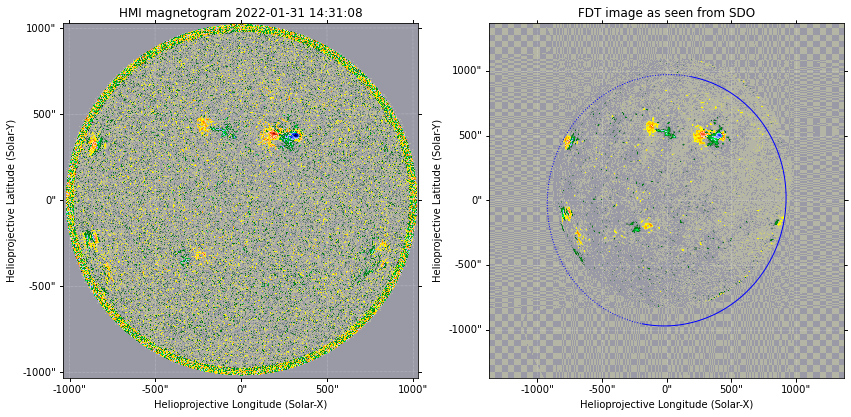

In [33]:
fig = plt.figure(figsize = (14,14))
ax1 = fig.add_subplot(121, projection=hmi_blos)
hmi_blos.plot(axes=ax1)
ax2 = fig.add_subplot(122, projection=fdt_shift)
fdt_shift.plot(axes=ax2, title='FDT image as seen from SDO')
fdt_blos.draw_limb(axes=ax2, color='blue')